# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from ipynb.fs.full.parse_dataset import Crawler
import sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

TEST_SIZE = 231
FEATURES = 25
OUTPUTS = 3

if __name__ == "__main__":
    n_input = 25 # MNIST data input (img shape: 28*28)
    n_treatments = 3 # MNIST total classes (0-9 digits)
    tf.compat.v1.disable_eager_execution()
    x = tf.compat.v1.placeholder("float", [None, n_input])
    y = tf.compat.v1.placeholder("float", [None, n_treatments])

# Data Extraction and preprocessing

        PATIENT_ID  AGE_AT_DIAGNOSIS          NPI       ER_IHC  \
count  1849.000000       1849.000000  1849.000000  1849.000000   
mean    957.274202         61.081952     4.047211     0.771769   
std     548.979903         12.958191     1.133734     0.419806   
min       1.000000         21.930000     1.020000     0.000000   
25%     486.000000         51.420000     3.050000     1.000000   
50%     954.000000         61.780000     4.042000     1.000000   
75%    1435.000000         70.590000     5.042000     1.000000   
max    1904.000000         96.290000     6.360000     1.000000   

       INFERRED_MENOPAUSAL_STATE  BREAST_SURGERY  CHEMOTHERAPY  \
count                1849.000000     1849.000000   1849.000000   
mean                    0.784749        0.598161      0.209843   
std                     0.411108        0.490402      0.407307   
min                     0.000000        0.000000      0.000000   
25%                     1.000000        0.000000      0.000000   
50%      

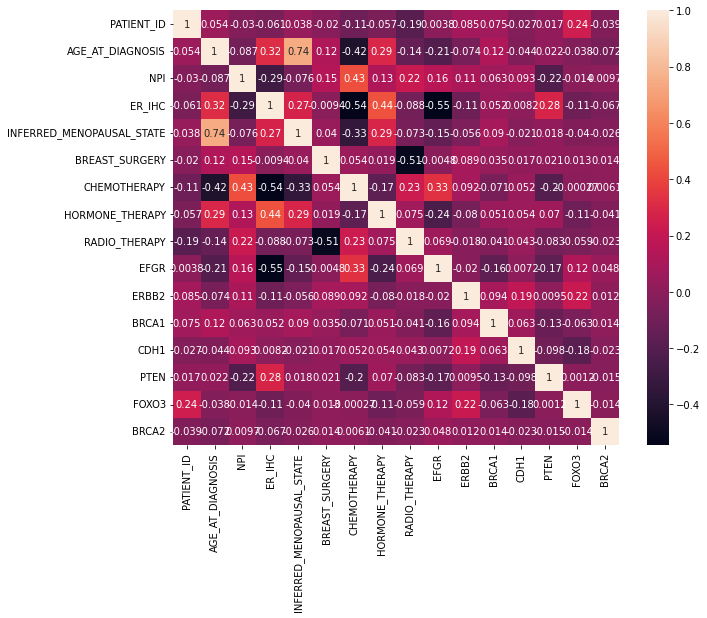

In [2]:
    objCrawler = Crawler("FinalCancer_Data.csv")
    data = objCrawler.parse_input()

In [3]:
    max0 = np.amax(data[:, np.r_[0]])
    max1 = np.amax(data[:, np.r_[1]])
    max5 = np.amax(data[:, np.r_[5]])
    max6 = np.amax(data[:, np.r_[6]])
    max7 = np.amax(data[:, np.r_[7]])
    max8 = np.amax(data[:, np.r_[8]])
    max9 = np.amax(data[:, np.r_[9]])
    max10 = np.amax(data[:, np.r_[10]])
    max11 = np.amax(data[:, np.r_[11]])

    for dataElements in data:
        dataElements[0] = dataElements[0]/max0
        dataElements[1] = dataElements[1]/max1
        dataElements[5] = dataElements[5]/max5
        dataElements[6] = dataElements[6]/max6
        dataElements[7] = dataElements[7]/max7
        dataElements[8] = dataElements[8]/max8
        dataElements[9] = dataElements[9]/max9
        dataElements[10] = dataElements[10]/max10
        dataElements[11] = dataElements[11]/max11

# creating Train and Test data

In [4]:
    testInput = data[:TEST_SIZE,:FEATURES]
    testOutput = data[:TEST_SIZE, -OUTPUTS:]

    trainInput = data[TEST_SIZE:, :FEATURES]
    trainOutput = data[TEST_SIZE:, -OUTPUTS:]

    train_size = len(trainInput)

   # Construct model

In [5]:
    import keras
    from keras.models import Sequential
    from keras.layers import Dense

    classifier = Sequential()
    classifier.add(Dense(2056, activation='relu', kernel_initializer='uniform',input_dim=25))
    classifier.add(Dense(1024, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(256, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(3, activation='sigmoid', kernel_initializer='uniform'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = classifier.fit(trainInput, trainOutput, batch_size = 10, epochs = 100,verbose=1 )

Train on 1351 samples
Epoch 1/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.4400 - accuracy: 0.7878
Epoch 2/100
1351/1351 [==============================] - 3s 3ms/sample - loss: 0.3937 - accuracy: 0.8228
Epoch 3/100
1351/1351 [==============================] - 5s 4ms/sample - loss: 0.3808 - accuracy: 0.8268
Epoch 4/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.3717 - accuracy: 0.8307
Epoch 5/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.3826 - accuracy: 0.8295
Epoch 6/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.3649 - accuracy: 0.8315
Epoch 7/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.3501 - accuracy: 0.8485
Epoch 8/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.3468 - accuracy: 0.8436
Epoch 9/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.3404 - accuracy: 0.8485
Epoch 10/100
1351/1351 [=========

1351/1351 [==============================] - 3s 2ms/sample - loss: 0.1951 - accuracy: 0.9025
Epoch 79/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.1932 - accuracy: 0.9087
Epoch 80/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.2005 - accuracy: 0.9038
Epoch 81/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.1896 - accuracy: 0.9097
Epoch 82/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.1956 - accuracy: 0.9062
Epoch 83/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.2009 - accuracy: 0.9065
Epoch 84/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.1943 - accuracy: 0.9075
Epoch 85/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.1909 - accuracy: 0.9043
Epoch 86/100
1351/1351 [==============================] - 3s 2ms/sample - loss: 0.1967 - accuracy: 0.9045
Epoch 87/100
1351/1351 [==============================] - 3

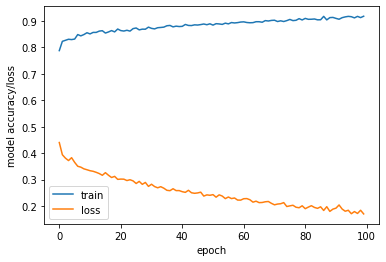

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('model accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train','loss'], loc='best')
plt.show()

# Testing Model

In [7]:
y_pred = classifier.predict(testInput)
y_pred = (y_pred > 0.30)

# Confusion Matrix

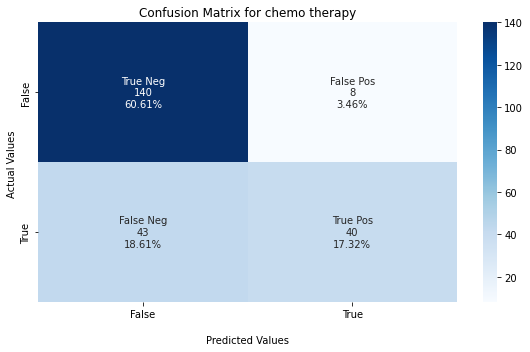

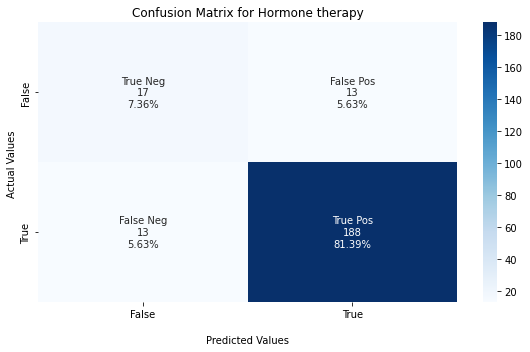

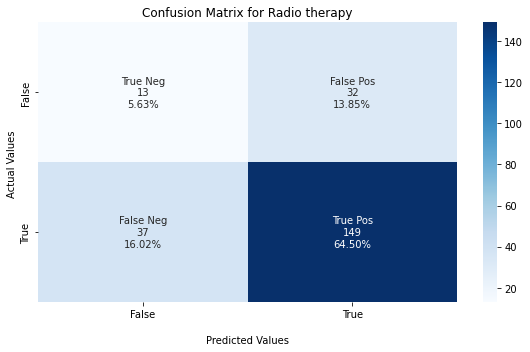

In [8]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_A = multilabel_confusion_matrix(testOutput, y_pred)[0]
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts1 = ["{0:0.0f}".format(value) for value in
                confusion_matrix_A.flatten()]
group_percentages1 = ["{0:.2%}".format(value) for value in
                     confusion_matrix_A.flatten()/np.sum(confusion_matrix_A)]
labels1 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts1,group_percentages1)]
labels1 = np.asarray(labels1).reshape(2,2)
plt.figure(figsize=(8,5))
ax = sns.heatmap(confusion_matrix_A, annot=labels1, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for chemo therapy');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()  
plt.show()

confusion_matrix_B = multilabel_confusion_matrix(testOutput, y_pred)[1]
group_counts2 = ["{0:0.0f}".format(value) for value in
                confusion_matrix_B.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in
                     confusion_matrix_B.flatten()/np.sum(confusion_matrix_B)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)
plt.figure(figsize=(8,5))
ax = sns.heatmap(confusion_matrix_B, annot=labels2, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Hormone therapy');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
plt.show()

confusion_matrix_C = multilabel_confusion_matrix(testOutput, y_pred)[2]
group_counts3 = ["{0:0.0f}".format(value) for value in
                confusion_matrix_C.flatten()]
group_percentages3 = ["{0:.2%}".format(value) for value in
                     confusion_matrix_C.flatten()/np.sum(confusion_matrix_C)]
labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts3,group_percentages3)]
labels3 = np.asarray(labels3).reshape(2,2)
plt.figure(figsize=(8,5))
ax = sns.heatmap(confusion_matrix_C, annot=labels3, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Radio therapy');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
plt.show()

# Testing Accracy

In [9]:
  def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[1]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[1]
    
  Accuracy(testOutput, y_pred)

0.7777777777777778

# Precision, Recall, F1 Measure

In [10]:
def Precision(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        
        if sum(y_true[i]) == 0:
            continue
        temp+= sum(np.logical_and(y_true[i], y_pred[i]))/ sum(y_true[i])
    return temp/ y_true.shape[0]
p = Precision(testOutput, y_pred)

def Recall(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        if sum(y_pred[i]) == 0:
            continue
        temp+= sum(np.logical_and(y_true[i], y_pred[i]))/ sum(y_pred[i])
    return temp/ y_true.shape[0]
r = Recall(testOutput,y_pred)

def F1Measure(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        if (sum(y_true[i]) == 0) and (sum(y_pred[i]) == 0):
            continue
        temp+= (2*sum(np.logical_and(y_true[i], y_pred[i])))/ (sum(y_true[i])+sum(y_pred[i]))
    return temp/ y_true.shape[0]
    
F1 = F1Measure(testOutput, y_pred)

print ("Precision = ",end="")
print ('%.3f'%p)
print ("Recall = ",end="")
print ('%.3f'%r)
print ("F1 Measure = ",end="")
print ('%.3f'%F1)


Precision = 0.816
Recall = 0.882
F1 Measure = 0.816


# Classification report

In [11]:
from sklearn.metrics import classification_report
label_names = ['CHEMO_THERAPY', 'HORMONE_THERAPY', 'RADIO_THERAPY']
print(classification_report(testOutput, y_pred,target_names=label_names))

                 precision    recall  f1-score   support

  CHEMO_THERAPY       0.83      0.48      0.61        83
HORMONE_THERAPY       0.94      0.94      0.94       201
  RADIO_THERAPY       0.82      0.80      0.81       186

      micro avg       0.88      0.80      0.84       470
      macro avg       0.86      0.74      0.79       470
   weighted avg       0.87      0.80      0.83       470
    samples avg       0.88      0.82      0.82       470



# Prediction for single instance

In [12]:
y1 = classifier.predict(testInput[10:11])
y1 = (y1 > 0.3)
for i in range(len(y1)):
    for j in range(len(y1[i])):
        if j == 0:
            if y1[i][j] == True:
                print("CHEMOTHERAPY",end=",")
        if j == 1:
            if y1[i][j] == True:
                print("HORMONE THERAPY",end=",")
        if j == 2:
            if y1[i][j] == True:
                print("RADIO THERAPY",end=",")
    print()

HORMONE THERAPY,RADIO THERAPY,


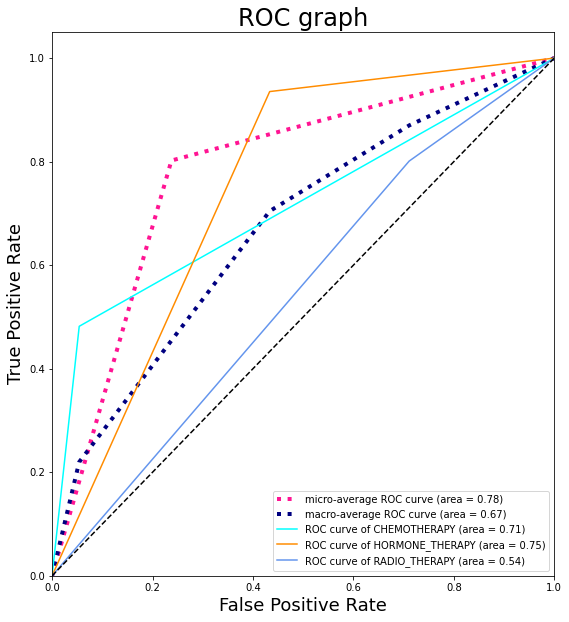

In [13]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_treatments):
    fpr[i], tpr[i], _ = roc_curve(testOutput[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(testOutput.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_treatments)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_treatments):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_treatments

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(plt.figure(figsize=(9,10)))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = ["aqua", "darkorange", "cornflowerblue"]
treatments = ["CHEMOTHERAPY","HORMONE_THERAPY","RADIO_THERAPY"]
for i, color, treatments in zip(range(n_treatments), colors,treatments):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of {0} (area = {1:0.2f})".format(treatments, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate",size=18)
plt.ylabel("True Positive Rate",size=18)
plt.title("ROC graph",size=24)
plt.legend(loc="lower right")
plt.show()

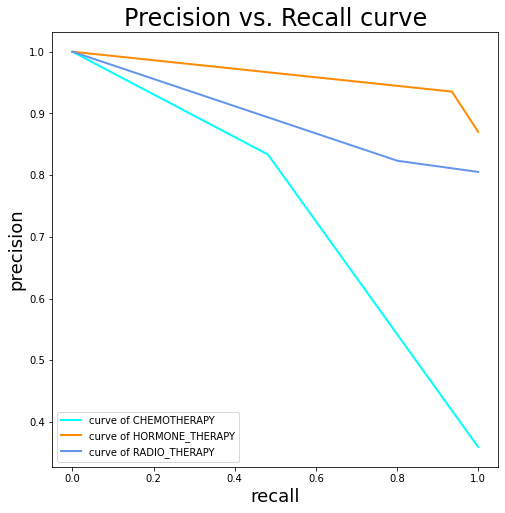

In [14]:
from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
plt.figure(figsize=(8,8))
colors = ["aqua", "darkorange", "cornflowerblue"]
treatments = ["CHEMOTHERAPY","HORMONE_THERAPY","RADIO_THERAPY"]
for i, color, treatments in zip(range(n_treatments), colors,treatments):
    precision[i], recall[i], _ = precision_recall_curve(testOutput[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2,color=color, label='curve of {0}'.format(treatments))
    
plt.xlabel("recall",size=18)
plt.ylabel("precision",size=18)
plt.legend(loc="best")
plt.title("Precision vs. Recall curve",size=24)
plt.show()